# Un peu de théorie sur k-PPV

## Motivation intuitive

L'algorithme des $k$ plus proches voisins ($k$-PPV) est certainement un des algorithmes les plus simples d'apprentissage automatique. Il est motivé par l'idée que des *entrées* $x_t$ semblables devraient avoir des *cibles* $y_t$ semblables. Ainsi, pour bien définir un algorithme $k$-PPV, il suffit de définir ce que veut dire *semblable* dans le contexte des entrées et de définir l'influence de ces voisins sur la prédiction de la cible pour une entrée de test.

Donc, pour obtenir une prédiction de la cible pour une entrée de test $x$, il suffit de trouver les k plus proches voisins selon une métrique déterminant jusqu'à quel point des entrées sont semblables (par exemple, la distance euclédienne ou norme $L^2$, ou de façon plus générale la norme $L^p$ de Minkowski) et d'utiliser ces $k$ plus proches voisins pour prédire la cible de $x$. Dans un problème de classification, la prédiction correspond à la classe majoritaire parmi les $k$ plus proches voisins, i.e. que l'ensemble des $k$ plus proches voisins votent pour la classe correspondant à leur cible respective et la classe recueillant le plus de vote est choisie en tant que prédiction par l'algorithme.

## Formalisation mathématique

Soit

* $x$ une entrée de test
* $m$ le nombre de classes
* $D_n = \{(x_t,y_t)\}_{t=1}^n$ l'ensemble d'entraînement, où $y \in Y=\{1,\dots,m\}$ correspond à l'identité de la classe cible de l'entrée $x_t$
* $d(\dot{},\dot{})$ une fonction de distance
* $V(x,T,d(\dot{},\dot{}),k)$ l'ensemble des $k$ plus proches voisins de $x$ parmi les entrées de $T$ ainsi que leur cible associée

La prédiction de classification par l'algorithme des k plus proches voisins est donc:

> $$f(x) = {\mbox{arg max}} \left( \frac{1}{k} \sum_{(x_i,y_i) \in V(x)} \mathrm{onehot}_{m}(y_i) \right)$$

Une fonction de distance couramment utilisée est la distance euclédienne:

> $$d(a,b)= \sqrt{\sum_{i=1}^d(a_i-b_i)^2}$$

qui est un cas spécifique, avec $p=2$, de la norme $L^p$ de Minkowski:

> $$d(a,b)= \left(\sum_{i=1}^d|a_i-b_i|^p\right)^\frac{1}{p}$$

## Pseudo-code

On définit un algorithme d'apprentissage en précisant sa procédure d'entraînement et de prédiction pour une nouvelle entrée de test. Étant donné que la procédure d'entraînement de l'algorithme $k$-PPV consiste simplement à mettre en mémoire l'ensemble d'entraînement $D_n$, voici donc la procédure de prédiction:

    definition k-PPV(x)
        pour i=1 à m
            faire 
            c[i]=0
            
        pour i=1 à k
            faire 
            voisins[i] = Null
            dists[i] = inf
    
        pour t=1 à n
            faire
            dt = d(X[t],x)
            j = argmax(dists)
            si dt < dists[j]
                alors
                voisins[j] = (X[t],Y[t])
                dists[j] = dt
                
        pour i=1 à k
            faire
            si voisins[i]!=Null
                alors
                X[i],Y[i] = voisins[i]
                c[Y[i]] = c[Y[i]] + 1
                
        retourner argmax(c)
        
Lorsque `dist` est une liste non triée, la procédure de prédiction s'exécute en temps $O(n(k+d))$. Il est cependant possible d'obtenir un temps d'exécution dans $O(n(log(k)+d))$, en utilisant une queue de priorité (monceau).

## Implémentations

Voici quelques applets accessibles sur le web, permettant de visualiser les propriétés de l'algorithme des k plus proches voisins:

 

* Classification binaire
  1. http://www.cs.cmu.edu/~zhuxj/courseproject/knndemo/KNN.html
  2. http://www.cs.technion.ac.il/~rani/LocBoost/index.html
* Estimation de densité
  1. http://www.eee.metu.edu.tr/~alatan/Courses/Demo/AppletKnn.html


# La mise en pratique!

## En guise d'introduction

On vous demande de concevoir un algorithme d'apprentissage permettant d'identifier des fleurs sur un convoyeur. Il s'agit de trois variétés d'iris. Le convoyeur est doté d'une caméra capable de mesurer les longueurs et largeurs des pétales et sépales de chaque fleur. C'est à partir de ces caractéristiques (traits) que vous devez déterminer la sorte de chaque fleur (la classe). Vous ne connaissez rien aux fleurs! Fort heureusement vous disposez d'un ensemble d'entraînement associant à divers exemples de mesures d'iris la bonne variété (classe). Armé de l'algo 1-PPV et de Python vous foncez tête baissée.

## Comment calculer une distance $L^p$ (Minkowski) entre deux vecteurs

Passons maintenant aux choses sérieuses. On désire obtenir la fonction `minkowski_vec` qui nous permet de comparer deux fleurs sur la base de leurs traits. Complétez la fonction suivante, puis testez-la sur deux exemples d'iris (revoir au besoin la démo 2 pour l'accès et l'importation de l'ensemble de données iris). 



In [2]:
import numpy as np

def minkowski_vec(x1,x2,p=2.0):
    diff = (np.abs(x1-x2)**p).sum()**(1.0/p)
    return diff

# pour tester
a = np.ones((10,5))
b = np.zeros((10,5))
print minkowski_vec(a[0],b[0])
print minkowski_vec(a[0],a[0])

2.2360679775
0.0


Rappelez-vous la [définition](http://en.wikipedia.org/wiki/Minkowski_distance) de la distance. 

**Chose importante:** on peut calculer cette distance en itérant sur chaque composante de x1 et x2, et en calculant la somme après, ou on peut profiter du fait que la plupart (ou même toutes) des opérations mathématiques (abs, +, -, \*\* etc.) sur des structures de données itérables (listes, vecteurs/matrices) produisent des résultats équivalents à l'application d'une boucle for, mais en beaucoup moins de temps (on parle des langages interprétés comme Python). Par exemple, on peut calculer la somme de la différence des valeurs absolues de x1 et x2 comme

    s = 0
    for i in range(x1.shape[0]):
        s = s + abs(x1[i] - x2[i])

ou simplement

    s = numpy.sum(numpy.abs(x1 - x2))

En plus d'être plus compacte, la deuxième option est beaucoup plus rapide (parce qu'elle fait appel à une implémentation efficace de sum et abs en C++).


## Comment calculer une distance $L^p$ entre un vecteur et une matrice

Il nous faut aussi une fonction qui va nous permettre de comparer une fleur avec tout un ensemble de fleurs, sur la base de leurs traits. On va maintenant modifier la fonction `minkowski` pour calculer une *distance* $L^p$ entre un vecteur et une matrice (c.a.d. une fonction qui va nous retourner un vecteur de distances $L^p$)

In [3]:
def minkowski_mat(x,Y,p=2.0):
    dist = (np.abs(x-Y)**p).sum(1)**(1.0/p)
    return dist

# pour tester
a = np.ones((10,5))
b = np.zeros((10,5))
print minkowski_mat(a,b)
print minkowski_mat(a,a)

[ 2.23606798  2.23606798  2.23606798  2.23606798  2.23606798  2.23606798
  2.23606798  2.23606798  2.23606798  2.23606798]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Comme pour `minkowski_vec`, il y a deux manières de procéder:
 
1. *Simple et inefficace:* en écrivant une boucle qui appelle la fonction `minkowski_vec(x,Y[i,:],p)` et garde les résultats dans le vecteur `dist`.
2. *Plus compliqué mais plus efficace:* en utilisant le fait que `numpy` fait quelque chose d'intelligent quand il évalue `x-Y`, car il retourne une matrice qui contient le vecteur `x-Y[i,:]` sur la rangée $i$ (le mécanisme qui rend cela possible s'appelle *broadcasting*). Voici une solution:

        def minkowski_mat(x,Y,p=2.0):
            diff = x - Y # diff sera une matrice
            absdiff = abs(diff) # absdiff sera une matrice
            powdiff = absdiff**p # powdiff sera une matrice
            s = numpy.sum(powdiff,axis=1) # calcule la somme de chaque rangée, s est un vecteur
            dist = s**(1.0/p) # dist sera un vecteur aussi
            return dist

    ou bien

        def minkowski_mat(x,Y,p=2.0):
            return (numpy.sum((abs(x-Y))**p,axis=1))**(1.0/p) 

Encore une fois, chose importante à retenir:  
**la  grande majorité des opérations vecteur-vecteur, vecteur-matrice ou bien matrice-matrice seront beaucoup plus efficaces en utilisant les
opérateurs numpy au lieu d'une boucle for.** (les raisons étant,  entre autres, le fait que python est un langage interprété et que numpy a  des implémentations très efficace pour certaines opérations vectorielles).
 
Vous avez peut-être remarqué que la différence entre les implémentations efficaces de `minkowski_vec` et `minkowski_mat` est seulement la partie: `axis=1`. L'exercice est de comprendre pourquoi il est nécessaire de spécifier sur quel *axe* on va faire la somme.

## 1-PPV

Enfin, nous y sommes! Complétez la fonction suivante et vérifiez son efficacité. 

In [4]:
def ppv(x,data,p=2): 
    caract = data[:,:-1]
    cibles = data[:,-1]
    dist = minkowski_mat(x, caract, p)
    return cibles[np.argmin(dist)]

À noter ici que `x` est le vecteur de caractéristiques (sans étiquette) de l'exemple de test. Ayant en mains la fonction `minkowski_mat`, les choses devrait être simple, car dist va contenir un vecteur/liste des distances. En utilisant `numpy.argmin` on va trouver l'exemple/la fleur qui est la plus *proche* (dans le sens de minkowski) de `x` et ainsi, on va conclure que l'étiquette (prédite) de `x` est celle de cet exemple.

## Conclusion

Nous avons maintenant en notre possession toutes les composantes de l'algorithme 1-PPV. Il reste simplement à en faire l'assemblage et à tester le tout. 

>Rappelez vous que les fonctions définies dans les cellules de code précédentes sont accessibles dans toutes les cellules subséquentes une fois les précédentes exécutés.

Afin de tester votre implémentation, écrivez une boucle `for` qui appelle, pour chaque exemple `i`, la fonction `ppv(iris[i,:-1],iris,p)` et qui compare la classe prédite avec `iris[i,-1]` (la vrai étiquette). Les deux devraient toujours être les mêmes (pourquoi?).

In [13]:
import numpy as np
iris = np.loadtxt('iris.txt')

predictions = np.zeros(iris.shape[0])
for i in range(iris.shape[0]):
    predictions[i] = ppv(iris[i,:-1],iris)
    
cibles = iris[:,-1]
print "taux d'erreur:",(1.0-(predictions==cibles).mean())*100.0

taux d'erreur: 0.0


## Bonus / trucs auxquels réfléchir pour la prochaine fois

* Divisez l'ensemble iris en deux - un ensemble d'entraînement qui contient 100 exemples (un sous-ensemble aléatoire!) et un ensemble de test qui contient le reste.
  * Utilisez le premier sous-ensemble comme données sur lesquelles on va calculer les distances minkowski (donc données d'entraînement).
  * Calculez la performance de votre algorithme sur les deux ensembles. Pourquoi y a-t-il une telle différence?               



In [8]:
indexes = np.arange(iris.shape[0])
# on utilise un seed pour que la série aléatoire soit toujours la même
# cela rend les expériences reproductibles
np.random.seed(3395)
np.random.shuffle(indexes)

train_set = iris[indexes[:50]]
test_set = iris[indexes[50:]]

# prédiction sur l'ensemble d'entrainement en utilisant le même ensemble pour trouver les 1-ppv
train_predictions = np.zeros(train_set.shape[0])
for i in range(train_set.shape[0]):
    train_predictions[i] = ppv(train_set[i,:-1],train_set)
    
# prédiction sur l'ensemble de test en utilisant l'ensemble d'entrainement pour trouver les 1-ppv
test_predictions = np.zeros(test_set.shape[0])
for i in range(test_set.shape[0]):
    test_predictions[i] = ppv(test_set[i,:-1],train)
    
print "Taux d'erreur sur l'ensemble d'entrainement", (1.0-(train_predictions==train_set[:,-1]).mean())*100.0
print "Taux d'erreur sur l'ensemble de test", (1.0-(test_predictions==test_set[:,-1]).mean())*100.0

Taux d'erreur sur l'ensemble d'entrainement 0.0
Taux d'erreur sur l'ensemble de test 5.0


* Implémentez l'algorithme $k$-PPV avec $k > 1$
   * Trouvez le $k$ qui donne la meilleure performance sur les deux ensembles - expliquez la différence.

Populating the interactive namespace from numpy and matplotlib
Meilleur résultat avec k = 2
Taux d'erreur sur l'ensemble de test 98.0


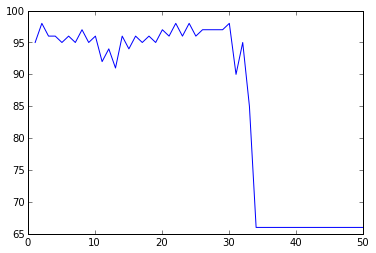

In [12]:
%pylab inline

def kppv(x,data,k,n_classes,p=2): 
    les_comptes = np.zeros(n_classes)
    
    distances = minkowski_mat(x,data[:,:-1])
    # on prend les indices jusqu'à k du vecteurs de distance trié
    ind_voisins = np.argsort(distances)[:k]
    cl_voisins = list(data[ind_voisins,-1]-1) # -1 car les cibles sont de 1 à 3 et on veut accèder aux index 0 à 2 de les_comptes
    
    for j in range(min(k,data.shape[0])): # on prend le min de k et data.shape[0] pour permettre un k plus grand que le nombre d'exemples (même si ça n'a pas de sens)
        les_comptes[cl_voisins[j]] += 1
    return np.argmax(les_comptes)

# on va tester les k-ppv de 0 à K
K = 50
n_classes = 3
ks = xrange(1,K+1)
results = np.zeros(len(ks))
for i, k in enumerate(ks):
    test_predictions = np.zeros(test_set.shape[0])
    for j in range(test_set.shape[0]):
        test_predictions[j] = kppv(test_set[j,:-1],train_set,k,n_classes)
        
    results[i] = (1.0-(test_predictions==test_set[:,-1]).mean())*100.0
    
print "Meilleur résultat avec k =",ks[np.argmax(results)]
print "Taux d'erreur sur l'ensemble de test", np.max(results)

# graphique du % d'erreur en fonction de k
x = np.linspace(1, K,K)
line, = plt.plot(x, results)

* Que se passe-t-il lorsque $k=100$?

In [ ]:
# à vous de le découvrir